In [ ]:
#importing warnings library to ignore warnings

import warnings
warnings.filterwarnings('ignore')



#import required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [4]:
#Read the data from csv file

df =pd.read_csv('day.csv')

In [38]:
#check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,NaN,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [39]:
#checking the shape of dataframe

df.shape

(730, 12)

In [40]:
#decribing the columns of dataframe

df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [42]:
#get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      0 non-null      object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [ ]:
## Insights
#There is 730 rows and 16 columns.
#One column is Object type else others are either type integer or float.
#Difference between mean and median is not much,so we can conclude that numerical columns are not having outliers.
#None of columns are having null values
#There is some intergers columns but catergorical in nature . Need to analyse those columns.

In [9]:
#checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Handling categorical columns


# Handling columns those are categorical in nature . Mapping it to actual value.
# season ,yr ,mnth ,holiday ,weekday ,workingday ,weathersit --> these are the columns with categorical values. 
# We will apply map to these columns except yr ,holiday , workingday as these columns are having binary values. 
# so resultant will be same after applying dummies function.

season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
share['season'] = share['season'].map(season_mapping)

In [48]:
#renaming few colums for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'},inplace=True)

In [49]:
#check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,NaN,0,NaN,0,NaN,0,NaN,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,NaN,0,NaN,0,NaN,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,NaN,0,NaN,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,NaN,0,NaN,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,NaN,0,NaN,1,NaN,9.305237,11.46350,43.6957,12.522300,1600


In [50]:
#checking datapath again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      0 non-null      object 
 1   year        730 non-null    int64  
 2   month       0 non-null      object 
 3   holiday     730 non-null    int64  
 4   weekday     0 non-null      object 
 5   workingday  730 non-null    int64  
 6   weathersit  0 non-null      object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [51]:
#droping unwantd extra columns

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,NaN,0,NaN,0,NaN,0,NaN,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,NaN,0,NaN,0,NaN,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,NaN,0,NaN,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,NaN,0,NaN,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,NaN,0,NaN,1,NaN,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#copying the dataframe into new

df_copy =df.copy()

In [15]:
#checking the shape of new dataframe

df_copy.shape

(730, 16)

In [17]:
#dropping the duplicate

df_copy.drop_duplicates(inplace=True)

In [19]:
#re-verifying the shapes of new dataframe

df_copy.shape

###As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.


(730, 16)

In [ ]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [22]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [23]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [24]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [25]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,NaN,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      0 non-null      object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [30]:
##Step 2: Visualising the Data

print(df.head())  # Print the first few rows of the DataFrame
print(df.shape)   # Check the shape of the DataFrame

  season  year month  holiday weekday  workingday weathersit       temp  \
0    NaN     0   jan        0     sat           0      Misty  14.110847   
1    NaN     0   jan        0     sun           0      Misty  14.902598   
2    NaN     0   jan        0     mon           1      Clear   8.050924   
3    NaN     0   jan        0     tue           1      Clear   8.200000   
4    NaN     0   jan        0     wed           1      Clear   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600  
(730, 12)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      0 non-null      object 
 1   year        730 non-null    int64  
 2   month       0 non-null      object 
 3   holiday     730 non-null    int64  
 4   weekday     0 non-null      object 
 5   workingday  730 non-null    int64  
 6   weathersit  0 non-null      object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [31]:
print(df.isna().sum())  # Check for missing values in each column

season        730
year            0
month           0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
humidity        0
windspeed       0
cnt             0
dtype: int64


In [35]:
print(df['cnt'].isna().sum())  # Check for missing values in 'cnt'
print(df['season'].isna().sum())  # Check for missing values in the categorical variable

0
730


In [61]:
print(df.columns)

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')


/home/jahid/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


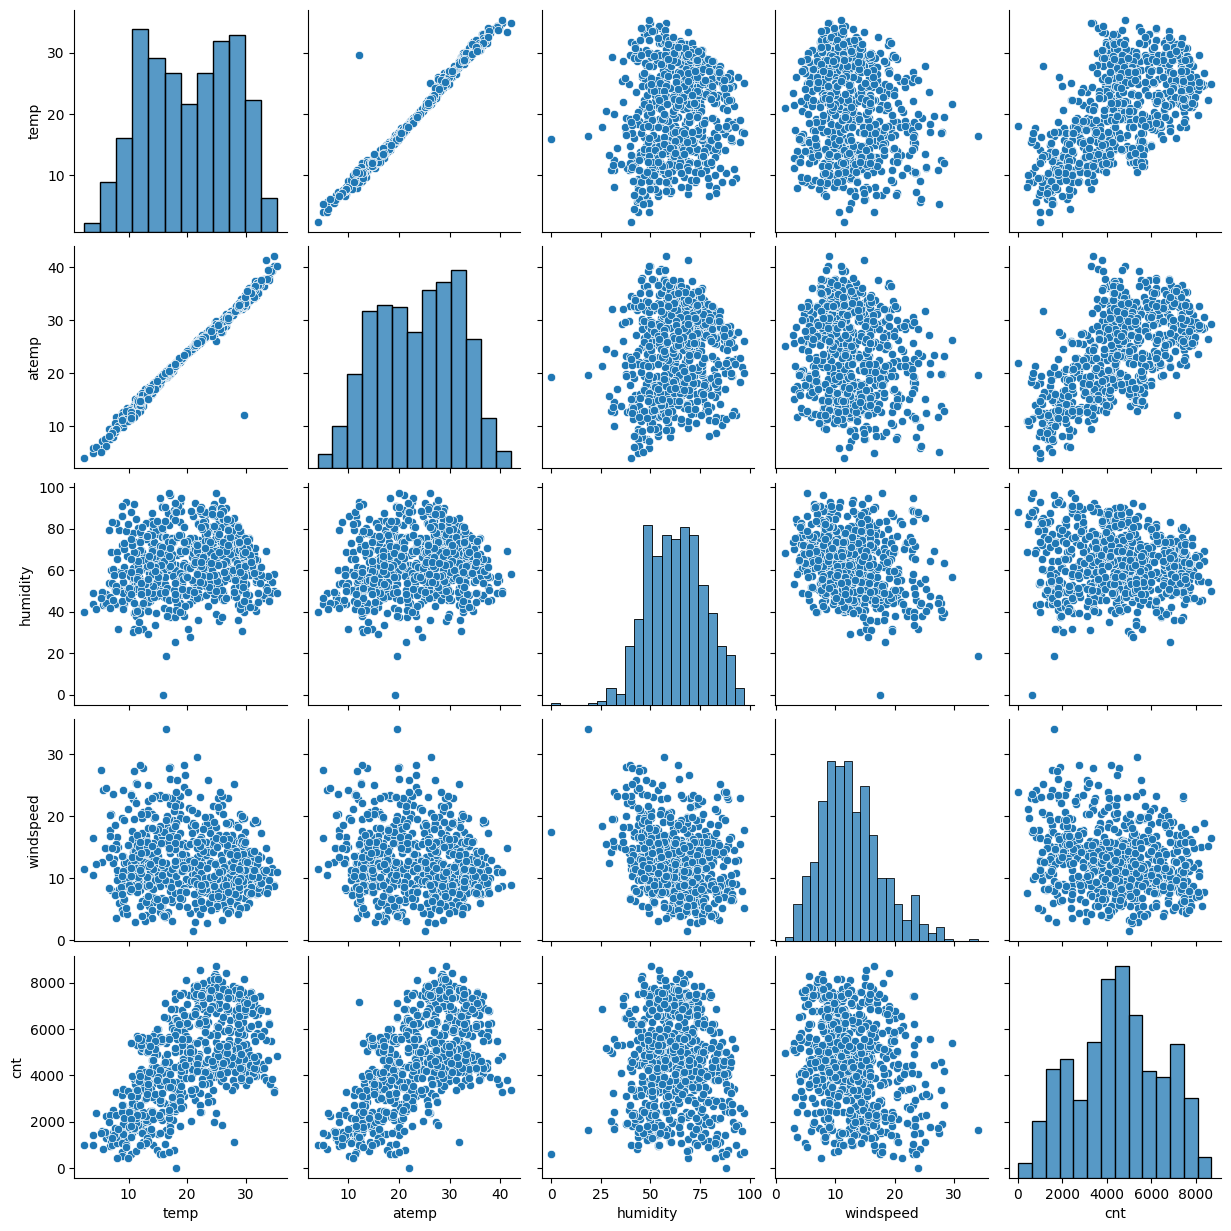

In [60]:
# Using Pairplot to visualize relation b/w numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

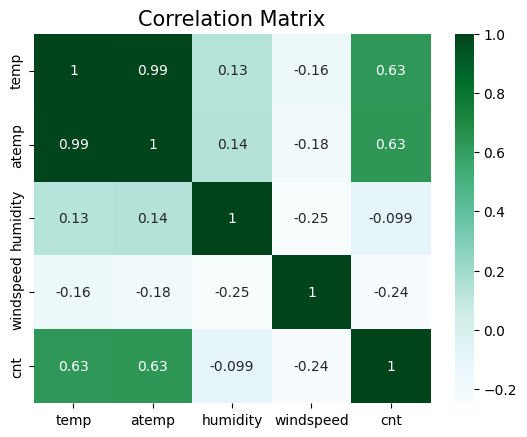

In [62]:
# Lets use correlation matrix for numerical columns
plt.title("Correlation Matrix",fontsize='15')
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), cmap='BuGn',annot=True)
plt.show()

In [63]:
#Insights
#  We can see linear relationship among columns temp , atemp and cnt.


In [64]:
# Visualizing categorical columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      0 non-null      object 
 1   year        730 non-null    int64  
 2   month       0 non-null      object 
 3   holiday     730 non-null    int64  
 4   weekday     0 non-null      object 
 5   workingday  730 non-null    int64  
 6   weathersit  0 non-null      object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [ ]:
#Data Visualisation
#Let's now spend some time doing what is arguably the most important step - understanding the data.

#Understanding the distribution of various numeric variables
#If there is some obvious multicollinearity going on, this is the first place to catch it
#Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
#We'll visualise our data using matplotlib and seaborn.

/tmp/ipykernel_12020/759279770.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['temp'], shade=True, ax=ax2)


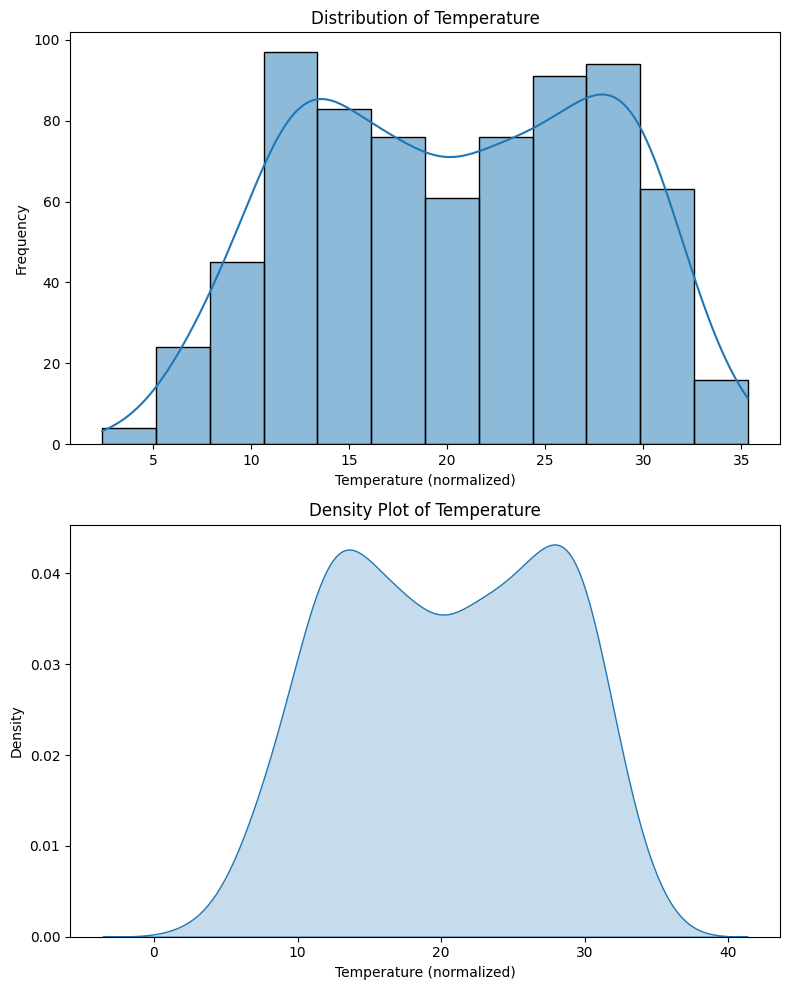

In [72]:
# temperature
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Plot temperature histogram on the first subplot
sns.histplot(x=df['temp'], kde=True, ax=ax1)
ax1.set_xlabel('Temperature (normalized)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Temperature')

# Plot temperature density plot on the second subplot
sns.kdeplot(x=df['temp'], shade=True, ax=ax2)
ax2.set_xlabel('Temperature (normalized)')
ax2.set_ylabel('Density')
ax2.set_title('Density Plot of Temperature')

plt.tight_layout()
plt.show()


/tmp/ipykernel_12020/201392472.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp'], ax=axs[0])
/tmp/ipykernel_12020/201392472.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['atemp'], ax=axs[1])


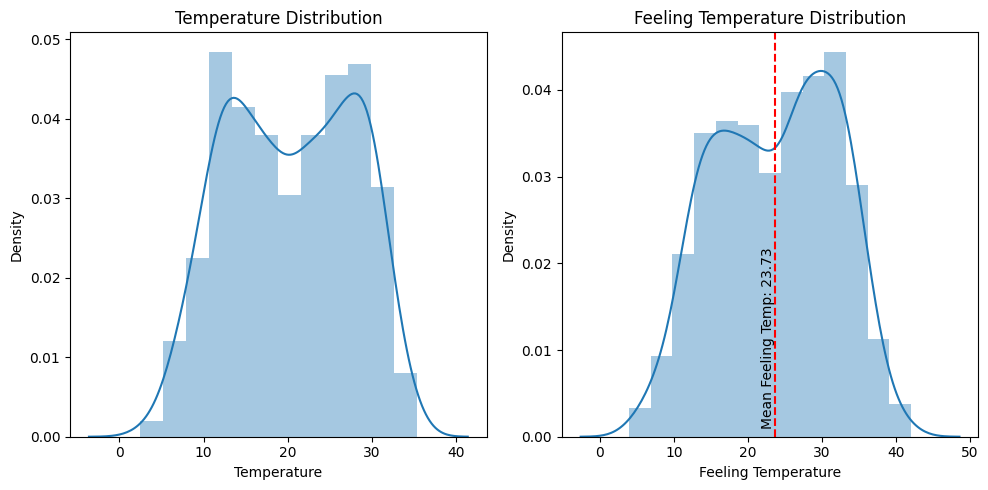

In [73]:
# feeling temperature
# Temperature and Feeling Temperature histogram
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(df['temp'], ax=axs[0])
sns.distplot(df['atemp'], ax=axs[1])
axs[0].set(title='Temperature Distribution', xlabel='Temperature')
axs[1].set(title='Feeling Temperature Distribution', xlabel='Feeling Temperature')

# Mean Feeling Temperature line
mean_feeling_temp = df['atemp'].mean()
axs[1].axvline(x=mean_feeling_temp, color='r', linestyle='--')
axs[1].text(mean_feeling_temp, 0.02, f'Mean Feeling Temp: {mean_feeling_temp:.2f}', rotation=90, va='bottom', ha='right', transform=axs[1].get_xaxis_transform())

plt.tight_layout()
plt.show()

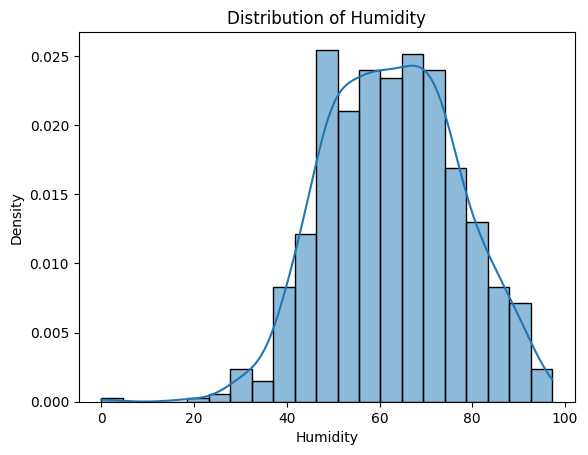

In [75]:
# humidity
sns.histplot(df['humidity'], kde=True, stat='density')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.title('Distribution of Humidity')
plt.show()

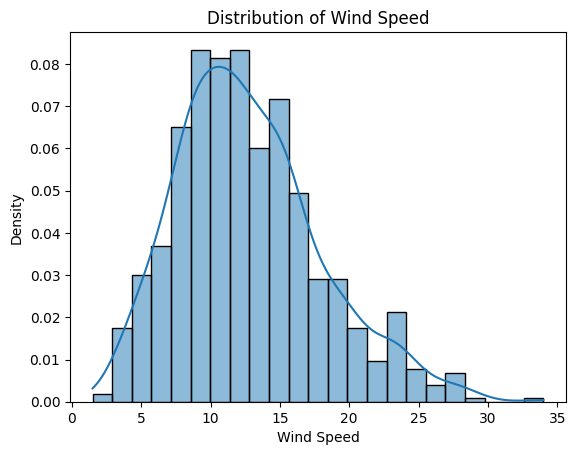

In [77]:
# wind speed
sns.histplot(df['windspeed'], kde=True, stat='density')
plt.xlabel('Wind Speed')
plt.ylabel('Density')
plt.title('Distribution of Wind Speed')
plt.show()

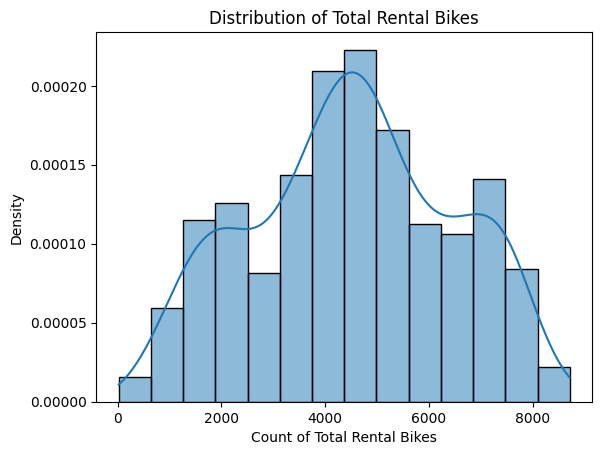

In [78]:
# Target variable: count of total rental bikes including both casual and registered
sns.histplot(df['cnt'], kde=True, stat='density')
plt.xlabel('Count of Total Rental Bikes')
plt.ylabel('Density')
plt.title('Distribution of Total Rental Bikes')
plt.show()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      0 non-null      object 
 1   year        730 non-null    int64  
 2   month       0 non-null      object 
 3   holiday     730 non-null    int64  
 4   weekday     0 non-null      object 
 5   workingday  730 non-null    int64  
 6   weathersit  0 non-null      object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


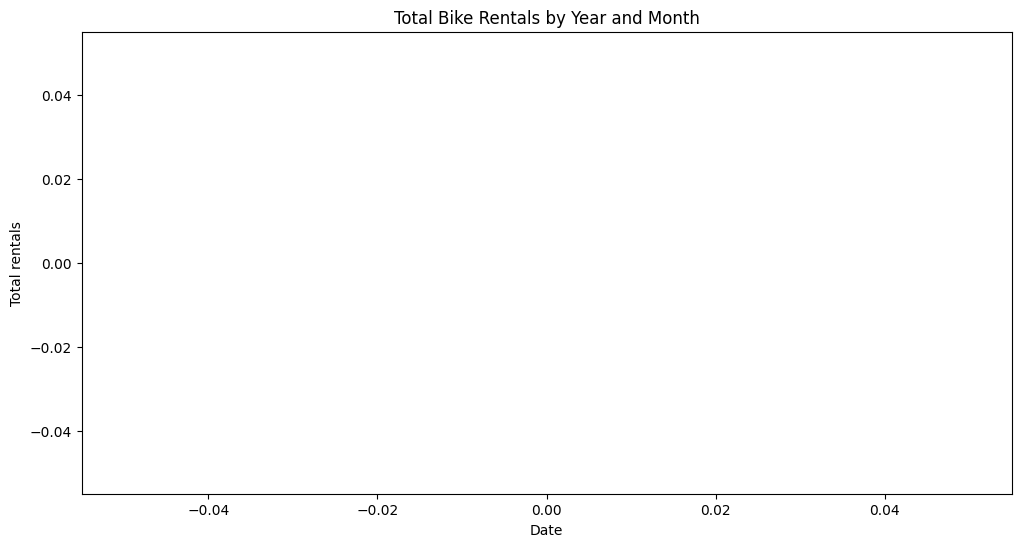

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x='year', y='cnt', style='month', data=df , ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Total rentals')
ax.set_title('Total Bike Rentals by Year and Month')

plt.show()

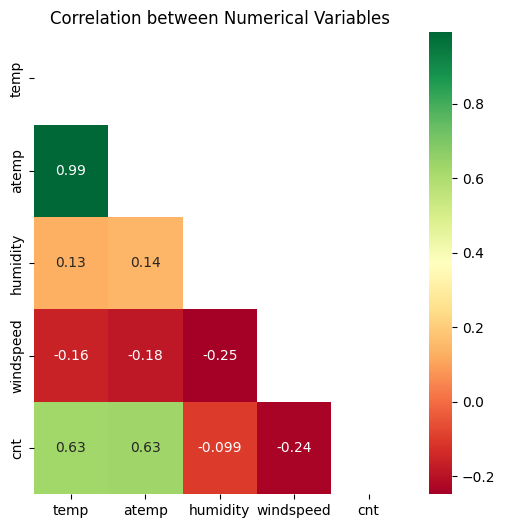

In [93]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [ ]:
#There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

In [ ]:
#Step 3: Data Preparation

In [94]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [95]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,NaN,0,NaN,0,NaN,0,NaN,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,NaN,0,NaN,0,NaN,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,NaN,0,NaN,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,NaN,0,NaN,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,NaN,0,NaN,1,NaN,9.305237,11.46350,43.6957,12.522300,1600


In [96]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [97]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,NaN,0,NaN,0,NaN,0,NaN,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,NaN,0,NaN,0,NaN,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,NaN,0,NaN,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,NaN,0,NaN,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,NaN,0,NaN,1,NaN,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
#5 rows × 34 columns

In [98]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      0 non-null      object 
 1   year        730 non-null    int64  
 2   month       0 non-null      object 
 3   holiday     730 non-null    int64  
 4   weekday     0 non-null      object 
 5   workingday  730 non-null    int64  
 6   weathersit  0 non-null      object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [99]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [100]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [101]:
# check the shape of new dataframe

df_new.shape

(730, 8)

In [102]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 45.8 KB


In [ ]:
#Step 4: Splitting the Data into Training and Testing Sets

In [103]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [104]:
# check the shape of training datatset

df_train.shape

(510, 8)

In [105]:
# check the shape of testing datatset

df_test.shape

(220, 8)

In [106]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [107]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683


In [ ]:
#5 rows × 30 columns

In [108]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [109]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [ ]:
5 rows × 8 columns

In [110]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#8 rows × 8 columns

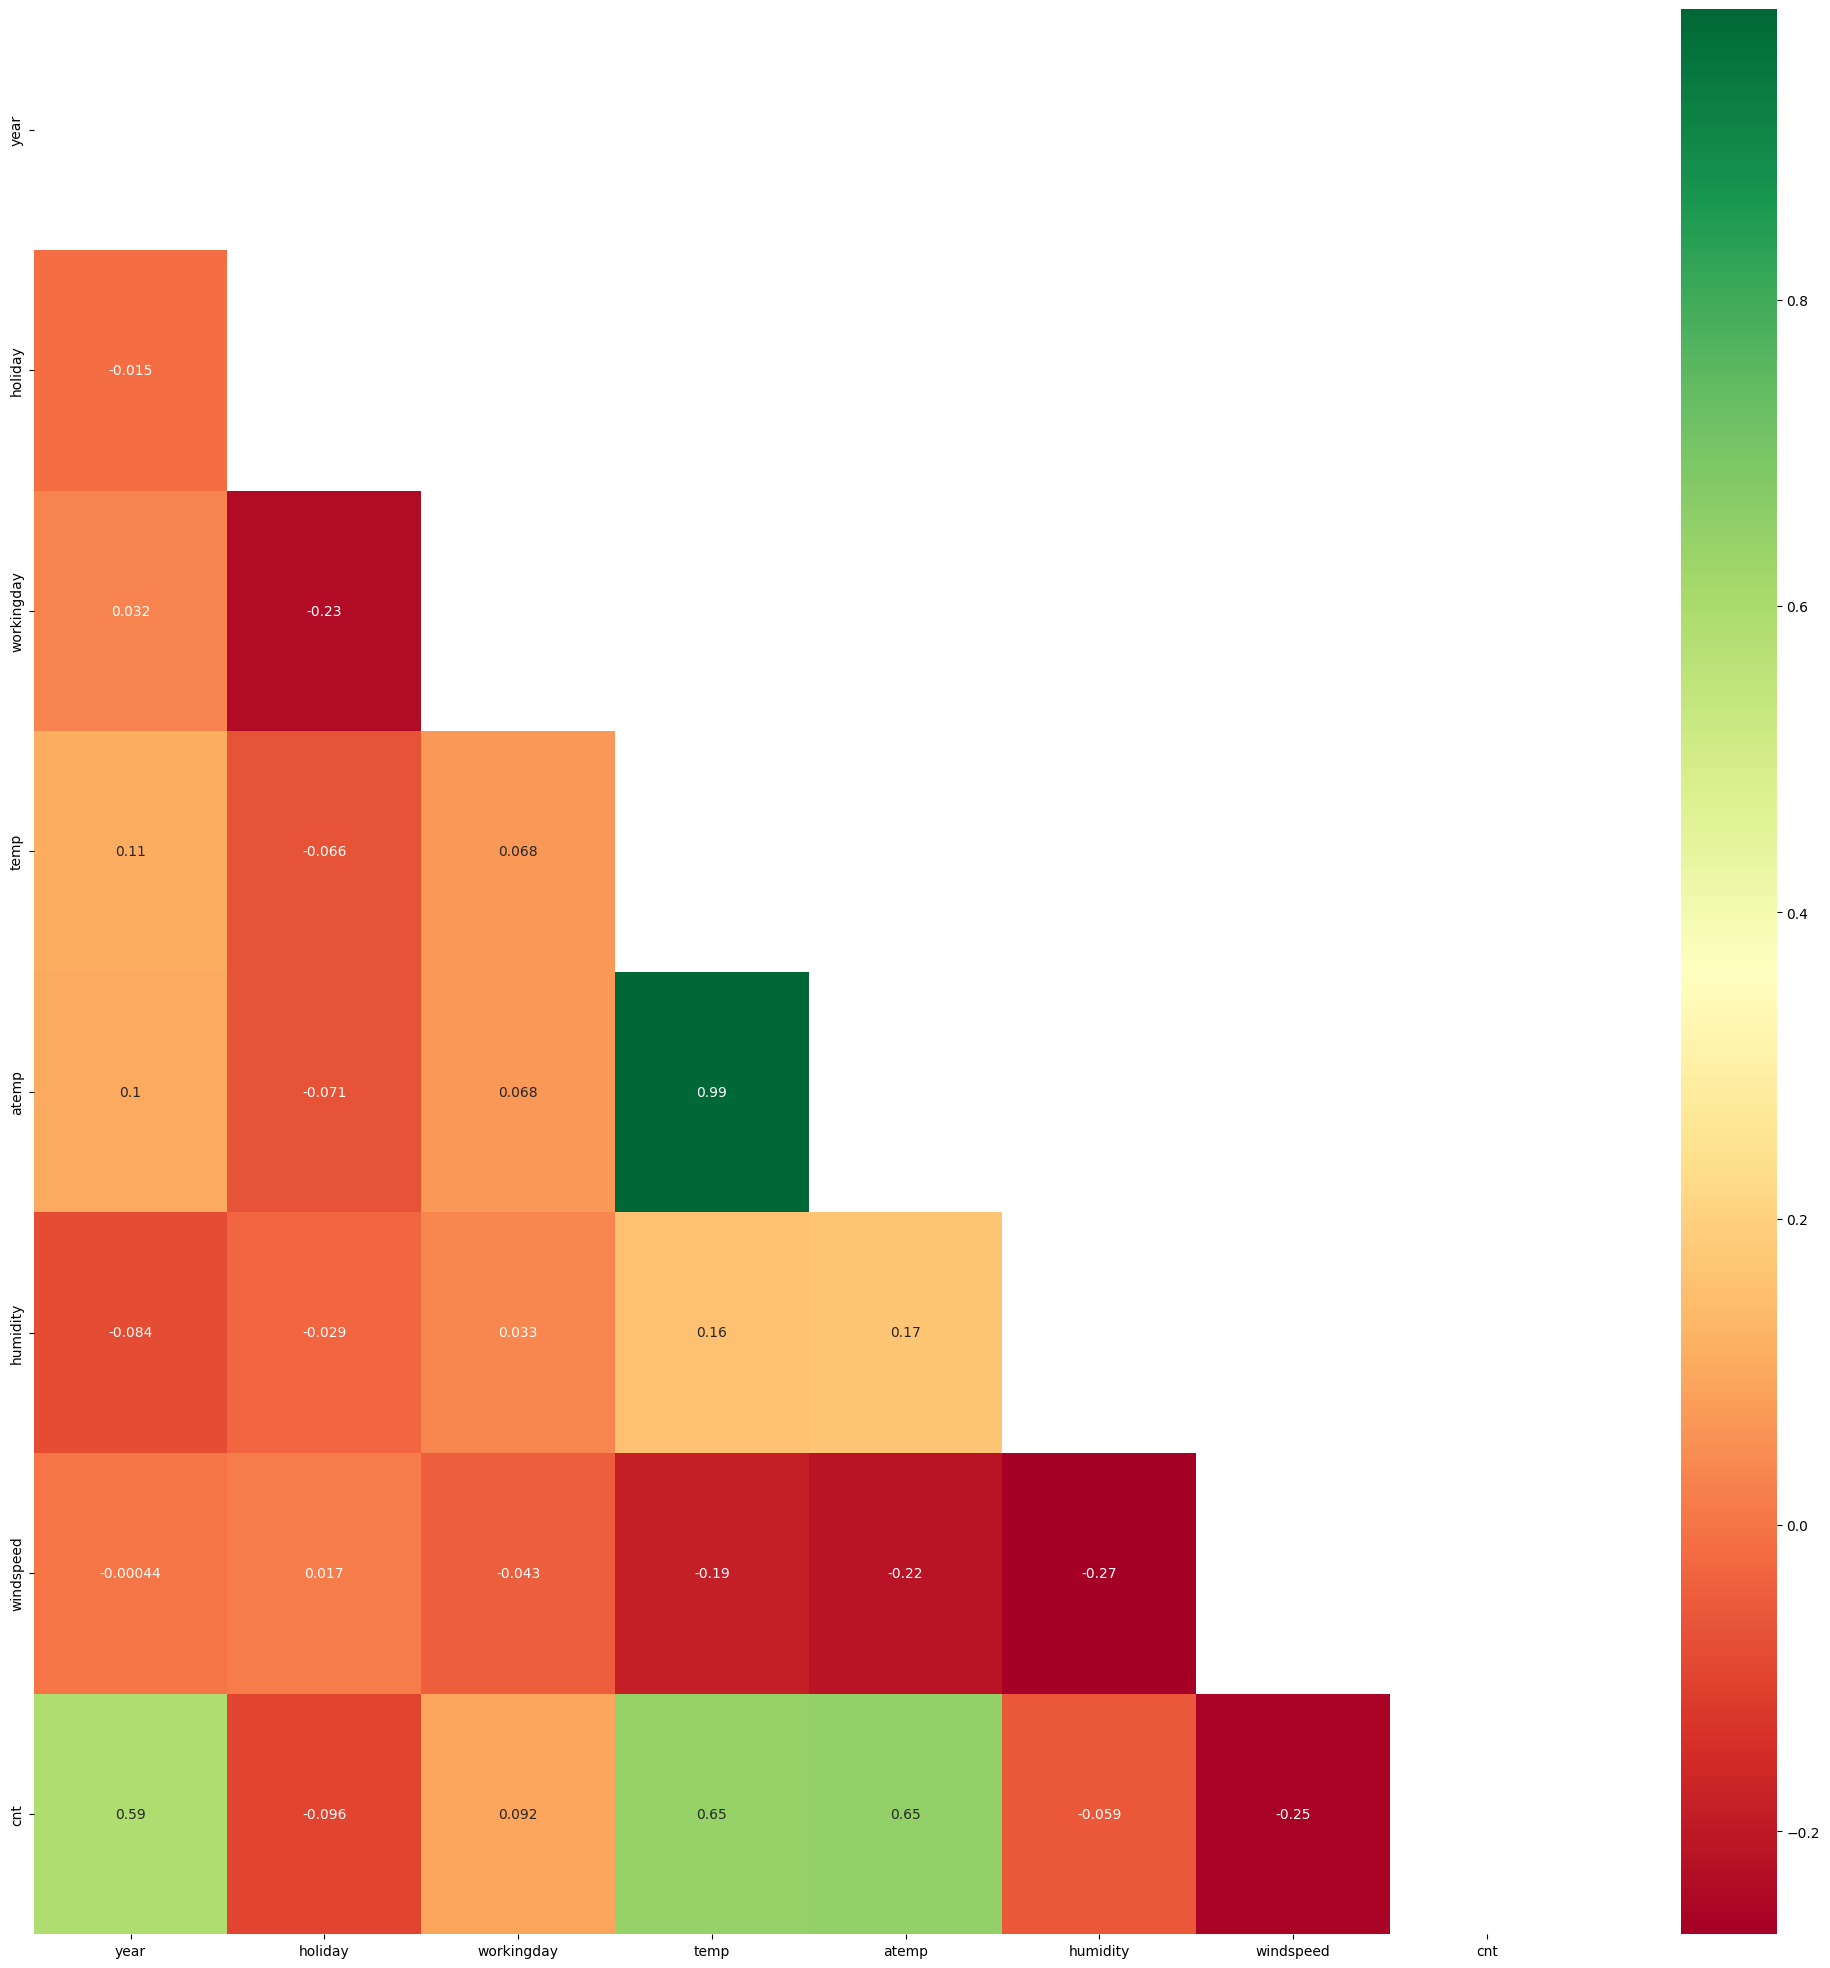

In [111]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

In [ ]:
#cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

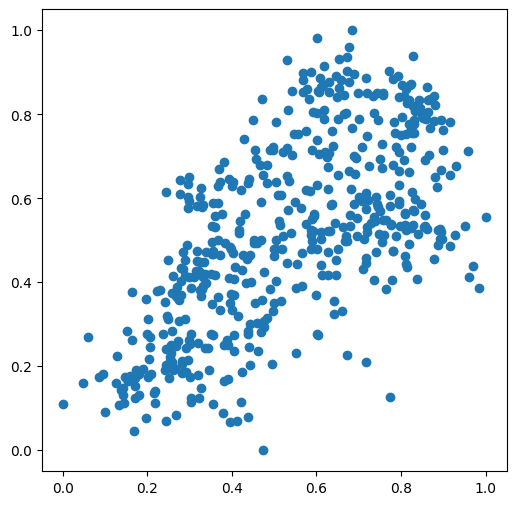

In [112]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [ ]:
#Visualization confirms the positive correlation between temp and cnt.

In [113]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [118]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [120]:

#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [121]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'temp', 'atemp', 'humidity', 'windspeed'], dtype='object')


In [122]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['holiday', 'workingday'], dtype='object')

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [130]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=7)

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


In [132]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,year,holiday,workingday,temp,atemp,humidity,windspeed
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1.0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475
111,1.0,0,0,1,0.345824,0.318819,0.751824,0.380981


In [133]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     204.4
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.67e-142
Time:                        00:02:36   Log-Likelihood:                 382.63
No. Observations:                 510   AIC:                            -749.3
Df Residuals:                     502   BIC:                            -715.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3108      0.032      9.619      0.0

In [ ]:
#Notes:
#[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
#Now let's check the VIF for these selected features and decide further.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = df.columns
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [134]:
b=X_train_rfe2.drop('const',axis=1)

In [142]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for columns with zero variance (all values are the same)
zero_variance_columns = df.columns[df.nunique() == 1]
print("Columns with Zero Variance:\n", zero_variance_columns)

Missing Values:
 season        0.0
year          0.0
month         0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
cnt           0.0
dtype: float64
Columns with Zero Variance:
 Index([], dtype='object')


In [137]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [143]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,atemp,341.72
1,temp,331.37
3,humidity,8.37
4,windspeed,3.48
0,year,2.00


In [ ]:
#atemp shows high value

In [ ]:
#Step 5: Building a linear model

In [144]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     282.9
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          9.98e-144
Time:                        00:14:51   Log-Likelihood:                 379.74
No. Observations:                 510   AIC:                            -747.5
Df Residuals:                     504   BIC:                            -722.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3131      0.032      9.920      0.0

In [145]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,324.42
2,atemp,321.53
3,windspeed,2.69
0,year,1.98


In [146]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     316.1
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          5.79e-136
Time:                        00:16:45   Log-Likelihood:                 358.63
No. Observations:                 510   AIC:                            -707.3
Df Residuals:                     505   BIC:                            -686.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1468      0.020      7.425      0.0

In [148]:
# We can drop year variable as it has high p-value
X_train_new = X_train_new.drop(['year'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,temp,324.41
1,atemp,320.94
2,windspeed,2.57


In [ ]:
#seems VIF doesn't affect more

In [149]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     130.3
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.57e-62
Time:                        00:19:29   Log-Likelihood:                 184.83
No. Observations:                 510   AIC:                            -361.7
Df Residuals:                     506   BIC:                            -344.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2325      0.027      8.537      0.0

In [160]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF


In [ ]:
# Building 4rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_4.summary())

In [166]:
# Checking the parameters and their coefficient values
lr_3.params

const        0.232489
temp         0.342139
atemp        0.295406
windspeed   -0.169711
dtype: float64

In [165]:
# Checking the parameters and their coefficient values
lr_2.params

const        0.146788
year         0.238260
temp         0.248038
atemp        0.333268
windspeed   -0.182655
dtype: float64

In [167]:
# Checking the parameters and their coefficient values
lr_1.params

const        0.313107
year         0.231402
temp         0.202819
atemp        0.402528
humidity    -0.243664
windspeed   -0.231198
dtype: float64

In [4]:
#Step 6 : Residual Analysis of the train data and validation

In [ ]:
x_train_lm_1

In [4]:
# Normality of errors terms

In [ ]:
from sklearn.linear_model import LinearRegression

# Predicting Y value of train data

y_train_pred = lm.predict(X_train_lm)

In [ ]:
#plot the histrogam of the errors terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [ ]:
#Making Predictions with the Final Model

In [ ]:
#Scaling te test data

num_col=['temp', 'atemp', 'hum', 'windspeed','cnt']

df[num_col] = scaler.transform(df[num_col])

In [ ]:
df.head()

In [ ]:
#Multi Colinearity

calculateVIF(X_train_new)

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [ ]:
#VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

In [12]:
## Linearity

In [ ]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'jan')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

In [23]:
#Homoscedasticity

In [ ]:
y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [ ]:
X_train_new = X_train_new.drop(['mnth'], axis = 1)


In [ ]:
#No visible pattern observed from above plot for residuals.

In [ ]:
#Independence of residuals
#Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

In [ ]:
#Step 7: Making Predictions Using the Final Model

#Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [ ]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

In [ ]:
df_test.describe()

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [ ]:
y_pred = lr_6.predict(X_test_lm_6)

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

In [27]:
## Step 8: Model Evaluation
     ##Let's now plot the graph for actual versus predicted values.

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [ ]:
round(lr_4.params,4)

In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [ ]:
### Comparision between Training and Testing dataset:
#- Train dataset R^2          : 0.833
#- Test dataset R^2           : 0.8038
#- Train dataset Adjusted R^2 : 0.829    
#- Test dataset Adjusted R^2  : 0.7944

#Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.